# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

### 1. Is the distribution of body temperatures normal?

Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test

In [2]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
# Importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Text(0,0.5,'temperature count')

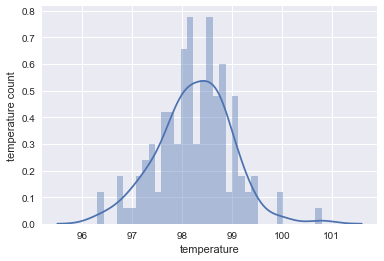

In [5]:
# Exploring the body temperature graphically
sns.set()
sns.distplot(df['temperature'], kde=True, bins=35)
plt.ylabel('temperature count')

According to the KDE of the histogram, the body temperature appears to have a normal distribution, but let's
quantitate this normality.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [7]:
df.temperature.skew()

-0.004419131168995771

The histogram and the measurement of skewness supports that the distribution of body temperature is relatively normal.

### 2. Is the sample size large? Are the observations independent?
Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

In [8]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


According to the central limit theorem, the means with sample sizes greater than or equal to 50 should have a fairly
normal distribution, even for highly skewed data. The sample size is large enough so that we can expect a relatively normal distribution.

Given that the world population is world population is over 7.5 billion, we can sufficiently assume that our sample of 130 is indepedent even without sampling replacement.

### 3. Is the true population mean really 98.6 degrees F?
First, try a bootstrap hypothesis test.
Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  tt  or  zz  statistic?
Now try using the other test. How is the result be different? Why?

Null hypothesis (Ho) = 98.6 F

Alternative Hypothesis (Ha) != 98.6 F


Two-sample test because we are checking for a difference in body temperature from the mean, but not in any particular direction.

In this situation, it is appropriate to use the t-statistic because we do not know the population standard deviation, and can only estimate the standard deviation using the sample standard deviation. Using the z-statistic would underestimate the true population mean.

In [7]:
# Bootstrap hypothesis test  and frequentist statistical testing with 10,000 replicates

temp_rep = np.empty(10000)

for i in range(10000):
    temp_rep[i] = np.mean(np.random.choice(df['temperature'], len(df['temperature'])))

confidence_interval = np.percentile(temp_rep, [2.5, 97.5])
p_value = sum(temp_rep >= 98.6) / len(temp_rep)
print ('Bootstrap mean:', np.mean(temp_rep))
print ('95% Confidence Interval:', confidence_interval)
print ('p-value:', p_value)

Bootstrap mean: 98.24853023076923
95% Confidence Interval: [98.11998077 98.37538462]
p-value: 0.0


According to the bootstrap hypothesis test and frequentist statsitical testing, we can reject the null hypothesis which supports that 98.6 degrees F is not the true population mean

In [5]:
# Explore the data using t and z statistics
import scipy

In [8]:
# T-test
t_stats = scipy.stats.ttest_1samp(df['temperature'], 98.6)
t_stats_repl = scipy.stats.ttest_1samp(temp_rep, 98.6)

print ('Original t-score:', t_stats)
print ('Bootstrap t-score:', t_stats_repl)

Original t-score: Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)
Bootstrap t-score: Ttest_1sampResult(statistic=-543.2039793336239, pvalue=0.0)


In [10]:
# Z-score
z_score = (98.6 - np.mean(df['temperature']) / np.std(df['temperature']))
z_score_repl = (98.6 - np.mean(temp_rep)) / np.std(temp_rep)

print ('Original z-score:', z_score)
print ('Bootstrap z-score:', z_score_repl)

Original z-score: -35.922057006810235
Bootstrap z-score: 5.432311415697753


The t-score for original dataset strongly reject the null hypothesis.
The z-score  rejects the null hypothesis even further.

### 4.Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

In [11]:
small_sample = np.random.choice(df['temperature'], 10)

print (small_sample, '\nMean:', np.mean(small_sample))

[98.2 96.4 98.8 98.6 97.8 98.7 97.  98.2 97.9 99.4] 
Mean: 98.1


In [12]:
small_bootstrap = np.empty(10)

for i in range(10):
    small_bootstrap[i] = np.mean(np.random.choice(df['temperature'], 10))
    
print (small_bootstrap, '\n', 'Max:', max(small_bootstrap), '\n', 'Min:', min(small_bootstrap))

# Taking a sample of size 10 from the dataset allows for large mean fluctuations

[97.76 98.32 98.15 97.93 98.17 98.35 97.99 98.3  98.03 98.36] 
 Max: 98.35999999999999 
 Min: 97.76


In [14]:
# Bootstrap hypothesis test and frequentist tests with alpha = 0.05

small_repl = np.empty(10000)

for i in range(10000):
    small_repl[i] = np.mean(np.random.choice(small_sample, len(small_sample)))

small_confidence_interval = np.percentile(small_repl, [2.5, 97.5])
small_p_value = sum(small_repl == 98.6) / len(small_repl)

print ('Bootstrap Mean:', np.mean(small_repl))
print ('95% Confidence Interval:', small_confidence_interval)
print ('p-value:', small_p_value)

Bootstrap Mean: 98.099798
95% Confidence Interval: [97.56 98.6 ]
p-value: 0.0015


According to bootstrap hypothesis and the frequentist test, the results reject the null hypothesis that the population mean is 98.6 degrees F.

In [15]:
# T-test
t_stats = scipy.stats.ttest_1samp(small_sample, 98.6)
t_stats_repl = scipy.stats.ttest_1samp(small_repl, 98.6)

print ('Original t-score:', t_stats)
print ('Bootstrap t-score:', t_stats_repl)

Original t-score: Ttest_1sampResult(statistic=-1.7877423548354867, pvalue=0.1074538141843009)
Bootstrap t-score: Ttest_1sampResult(statistic=-189.34919192126534, pvalue=0.0)


In [16]:
# Z-score
z_score = (98.6 - np.mean(small_sample) / np.std(small_sample))
z_score_repl = (98.6 - np.mean(small_repl)) / np.std(small_repl)

print ('Original z-score:', z_score)
print ('Bootstrap z-score:', z_score_repl)

Original z-score: -18.318350006240834
Bootstrap z-score: 1.8935866009098006


The z-score suggests that the assumed body temperature (null hypothesis) of 98.6 degrees F is within 1.89 standard deviations (p-value = 0.0294) of the mean for the samples with size 10. Although this still rejects the null hypothesis, this is a lower standard deviation relative to the results from the t-test.

### 5. At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [18]:
print ('Original Mean:', np.mean(df['temperature']))
print ('95% Confidence Interval:', np.percentile(df['temperature'], [2.5, 97.5]))
print ('Margin of Error:', np.std(df['temperature']) * 1.96 / np.sqrt(130))

Original Mean: 98.24923076923078
95% Confidence Interval: [96.7225 99.4775]
Margin of Error: 0.125550964802579


In [19]:
single_bootstrap = np.random.choice(df['temperature'], len(df['temperature']))

single_con_int = np.percentile(single_bootstrap, [2.5, 97.5])
print ('Bootstrap Mean:', np.mean(single_bootstrap))
print ('95% Confidence Interval:', single_con_int)

Bootstrap Mean: 98.25769230769231
95% Confidence Interval: [96.7225 99.4775]


In [20]:
# 95% Confidence interval occurs at z-score of 1.96 and t-score (n=130) of 1.964
print ('Margin of Error:', np.std(single_bootstrap) * 1.96 / np.sqrt(130))

Margin of Error: 0.12574308202194218


Since the data suggests that the true population mean for body temperature is within (96.7, 99.4) with a 95% confidence, we could approximate that any temperature about 1 degree outside of the interval as abnormal. (Temp <= 95.7 degrees F or Temp >= 100.4 degrees F)

### 6. Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

In [21]:
# Potential data visualizations swarmplots, box plots, overlaying histograms, etc.

In [ ]:
# We set the significance (alpha) at 0.05.

In [22]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [18]:
male_data = df[df.gender == 'M']
female_data = df[df.gender == 'F']

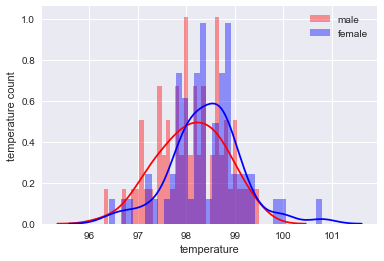

In [24]:
# Overlaying histograms
sns.distplot(male_data.temperature, color='red', kde=True, bins=35)
sns.distplot(female_data.temperature, color='blue', kde=True, bins=35)
plt.legend(['male', 'female'])
plt.ylabel('temperature count')
plt.show()

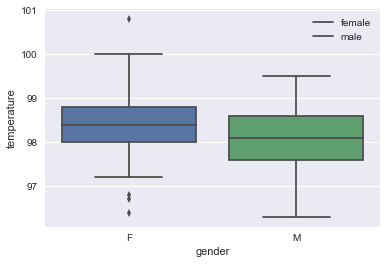

In [25]:
# Boxplot
sns.boxplot(x='gender', y='temperature', data=df)
plt.legend(['female', 'male'])

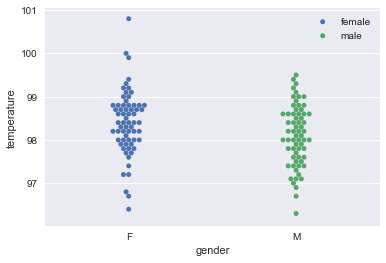

In [26]:
sns.swarmplot(x='gender', y='temperature', data=df)
plt.legend(['female', 'male'])

Graphical visualizations suggests that on average, females have a higher body temperature. However, the spread for the female population is larger than the male population. There is also a potential outlier at 100.8 degrees F, but since we can't decide if it's an actual outlier, we will include the datapoint for now.

To get a better idea, we're going to explore the difference with basic statistical analysis first.

In [27]:
male_data.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


In [28]:
female_data.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


As suggested by the graphical visualizations, the female population has a higher mean and standard deviation.

Now we'll test if the differenceb between the two is statistically significant using hypothesis testing.

In [41]:
# Single sample hypothesis test
permutated_data = np.random.permutation(np.concatenate((male_data.temperature, female_data.temperature)))
male_data2 = permutated_data[:len(male_data)]
female_data2 = permutated_data[len(male_data):]

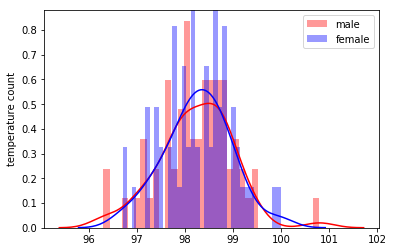

In [42]:
sns.distplot(male_data2, color='red', kde=True, bins=35)
sns.distplot(female_data2, color='blue', kde=True, bins=35)
plt.legend(['male', 'female'])
plt.ylabel('temperature count')
plt.show()

In [44]:
print ('Original Data:', np.mean(male_data.temperature) - np.mean(female_data.temperature))
print ('Permutated data:', np.mean(male_data2) - np.mean(female_data2))

Original Data: -0.289230769230727
Permutated data: -0.02769230769229125


There appears to be a difference between the permutated data and the original data. Now to check if this is statistically significant.

In [46]:
# Find the difference of means between the two groups.
diff_of_means = np.mean(female_data.temperature) - np.mean(male_data.temperature)

permutated_repl = np.empty(10000)

concat_data = np.concatenate((male_data.temperature, female_data.temperature))

for i in range(10000):
    permutated_data = np.random.permutation(concat_data)
    #print (permutated_data, '\n')
    m_d = permutated_data[:len(male_data)]
    f_d = permutated_data[len(male_data):]
    permutated_repl[i] = abs(np.mean(f_d) - np.mean(m_d))

p_value = np.sum(permutated_repl >= diff_of_means) / len(permutated_repl)
print('p-value:', p_value)

p-value: 0.0247


The p-value of 0.0247 (< 0.05) supports that the difference between the body temperature of the male and female samples are statistically significant.